# Exporting data from R
- https://www.guru99.com/r-exporting-data.html

# Exploring CLUE
- https://cran.r-project.org/web/packages/clue/index.html
- https://epub.wu.ac.at/3975/1/clue.pdf
- https://www.rdocumentation.org/packages/clue/versions/0.3-57
- https://www.rdocumentation.org/packages/clue/versions/0.3-57/topics/cl_consensus

In [1]:
x <- suppressWarnings
x(library(dplyr))
x(library(clue))
x(library(mlbench))
x(library(dbscan))
x(library(kernlab))
x(library(rlist))
x(library(quadprog))
x(library(lpSolve))
x(library(relations))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘relations’

The following object is masked from ‘package:kernlab’:

    ranking

The following object is masked from ‘package:dplyr’:

    sym



In [2]:
data("Cassini")

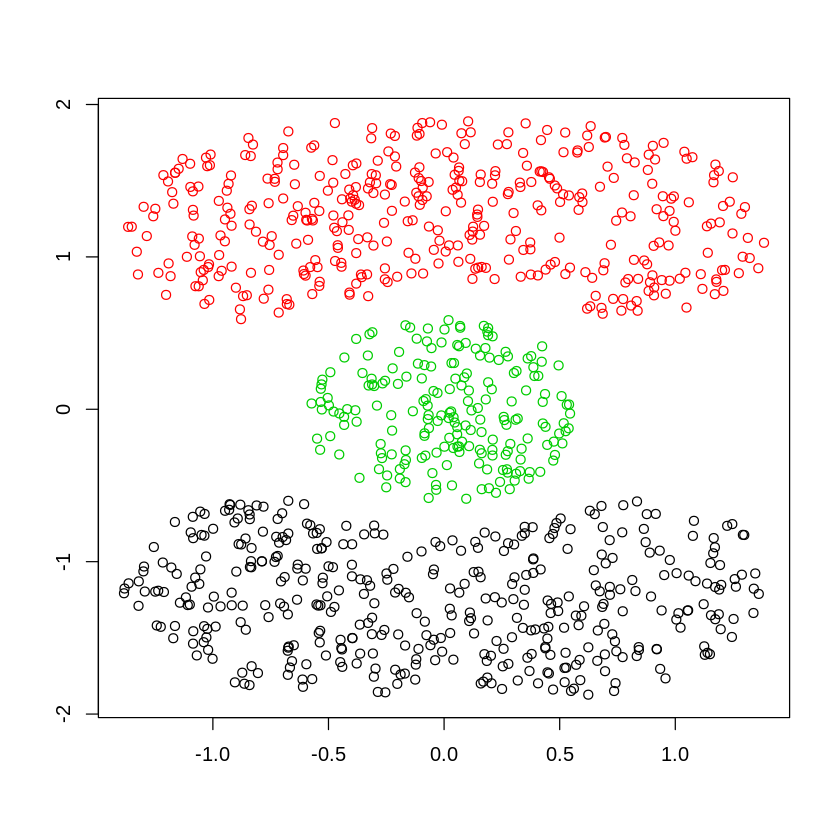

In [3]:
plot(Cassini$x, col = as.integer(Cassini$classes), xlab = "", ylab = "")

In [4]:
cassini_df = as.data.frame(Cassini)
cassini_df = subset (cassini_df, select = -classes)


In [5]:
cassini_df = data.matrix(cassini_df)
#write.csv(cassini_df, "cassini.csv")

In [6]:
is.numeric(cassini_df)

[1] TRUE

In [7]:
partition_list = list()
list_i = 1
n_clusters = list(2,3,4,5,6,7,8,9,10)

In [8]:
initial_centers = read.csv("initial_centers.csv", header=FALSE)
initial_centers = data.matrix(initial_centers)

In [9]:
partition_list = list()
list_i = 1
while( list_i <= length(n_clusters) ){
    partition_list[[list_i]] <- kmeans(cassini_df, centers=initial_centers[1:n_clusters[[list_i]],], iter.max = 100)
    list_i = list_i + 1
}

In [10]:
method_list = list("SE","GV1", "DWH", "HE", "soft/manhattan", "hard/manhattan", "GV3", "soft/symdiff")
consensus_output= list()
count = 1
for(x in method_list) {
    consensus_output[[count]] = cl_consensus(cl_ensemble(list = partition_list), method = x, weights = 1, control = list(k=3))
    count = count +1
}
count = 1

Iteration: 0 *** value: 574.872


In [13]:
pdf(file="cassini-clue-consensus-scatter-plot.pdf")
for(i in consensus_output) {
    plot(Cassini$x, col = cl_class_ids(i), xlab = "", ylab = "", main = paste("Consensus with method: ",method_list[[count]]))
    count = count + 1
}
dev.off()

png 
  2

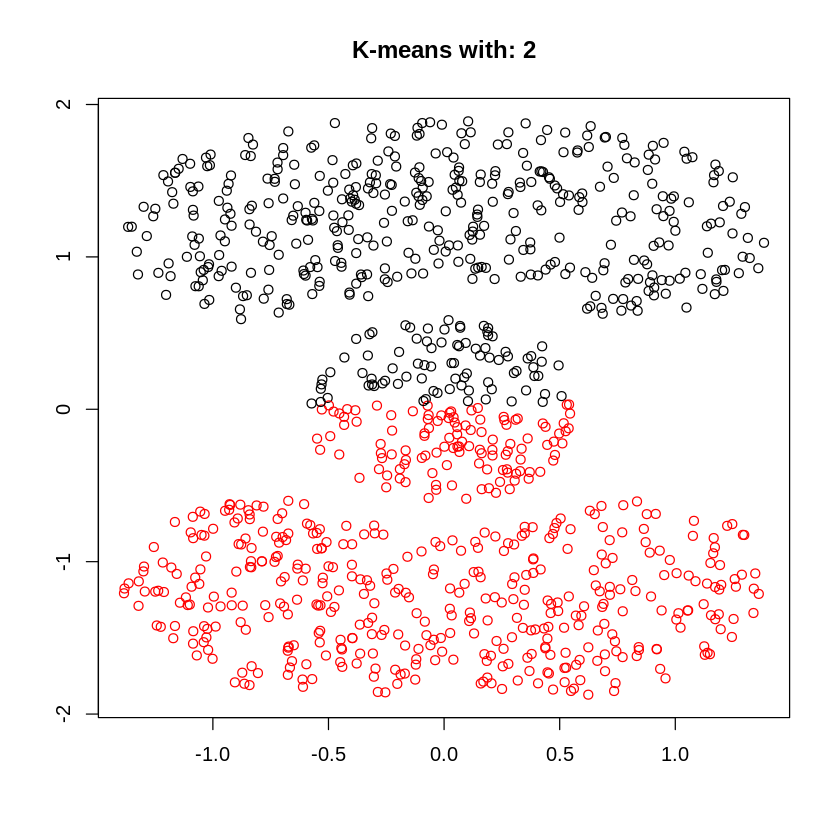

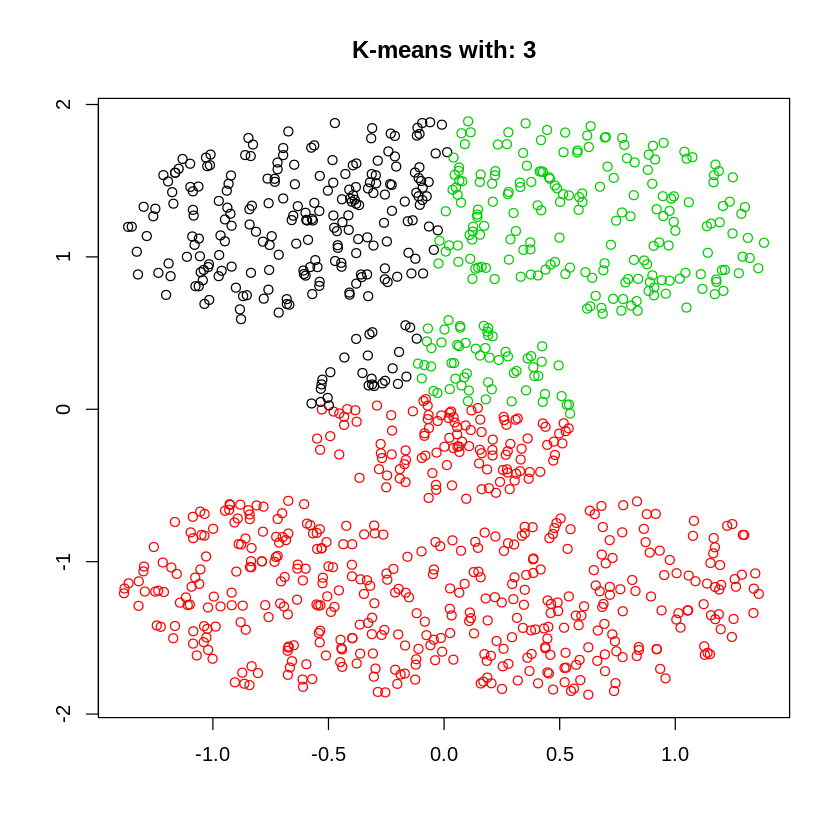

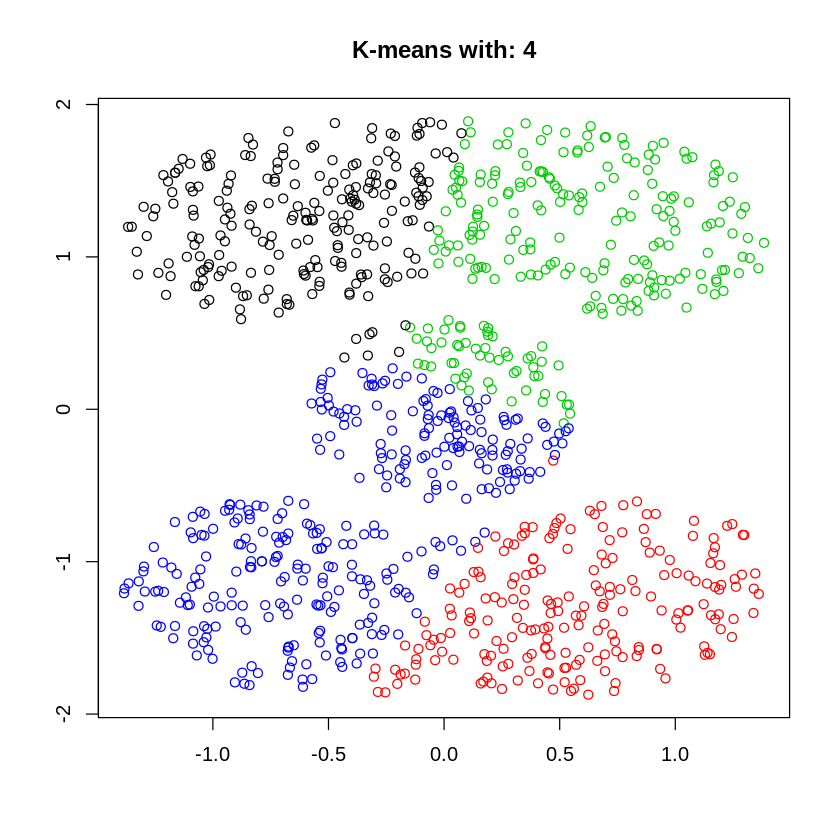

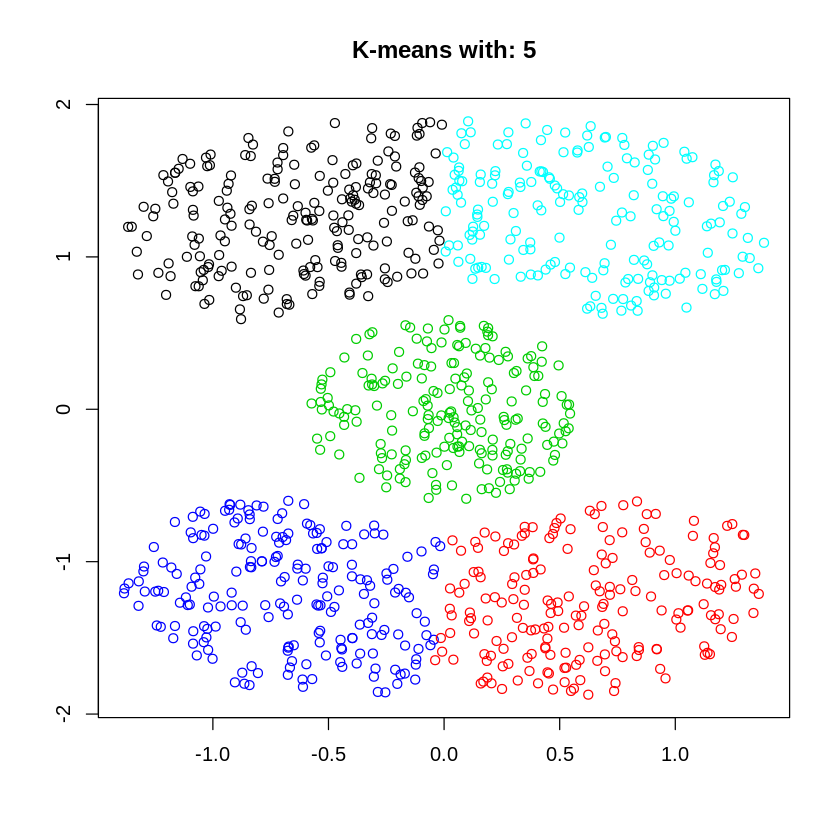

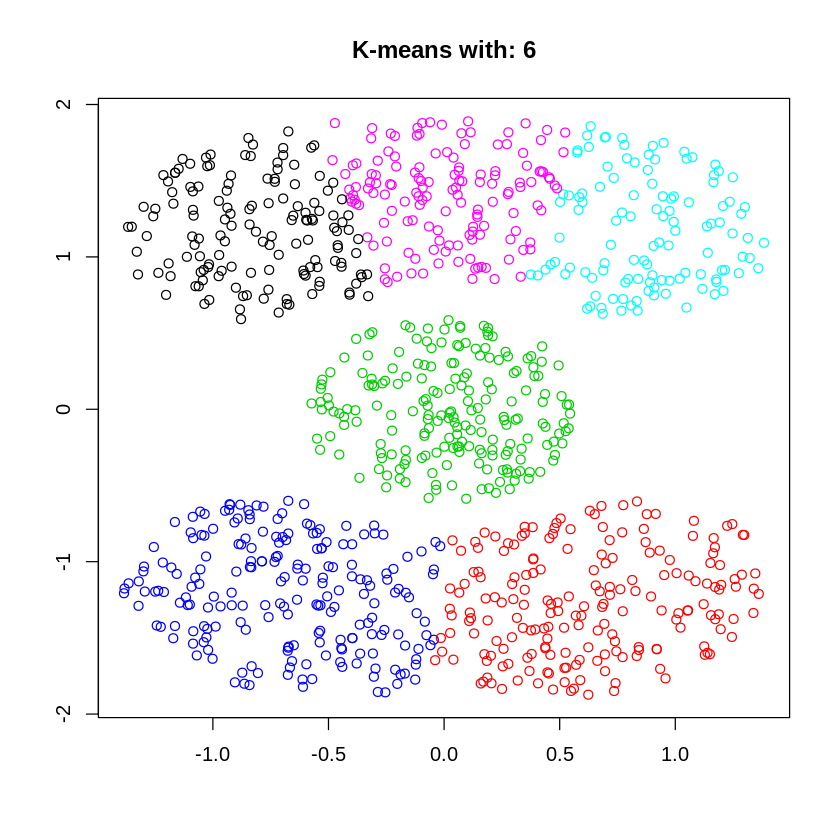

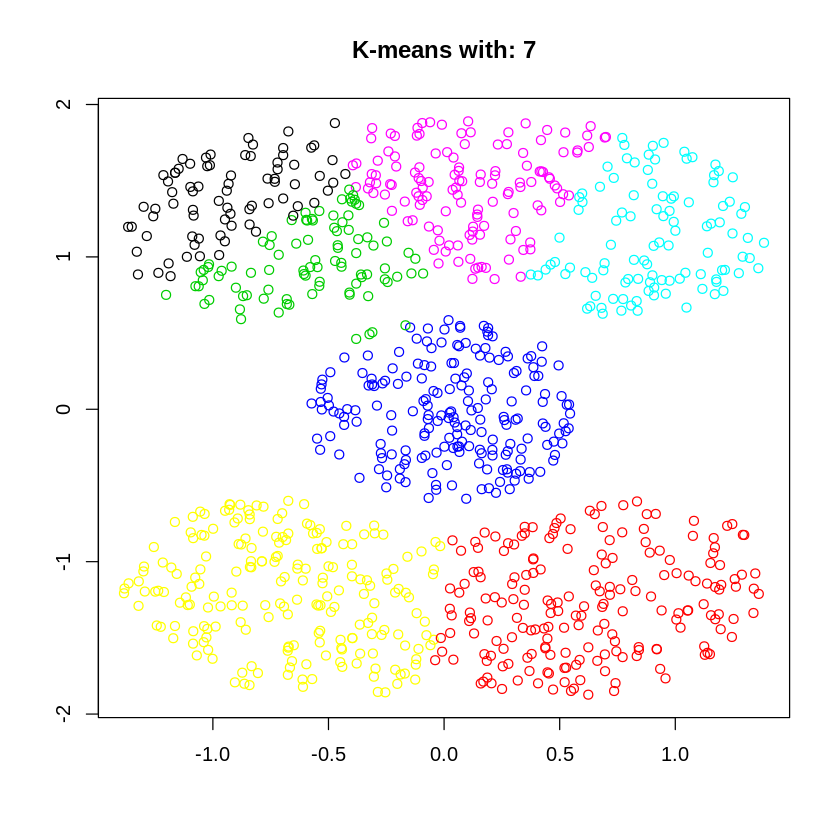

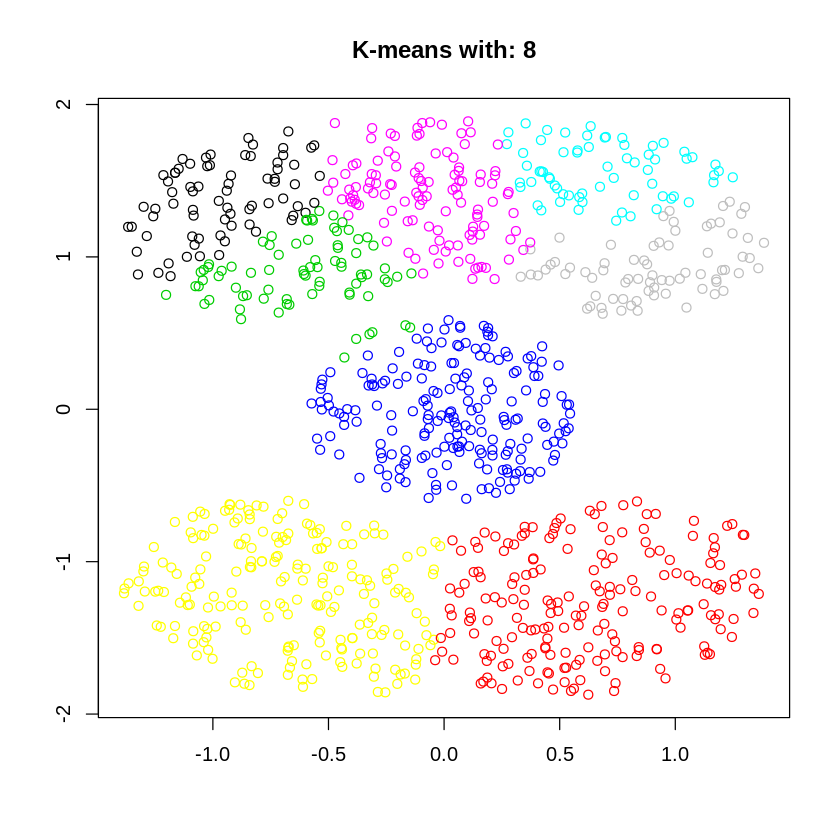

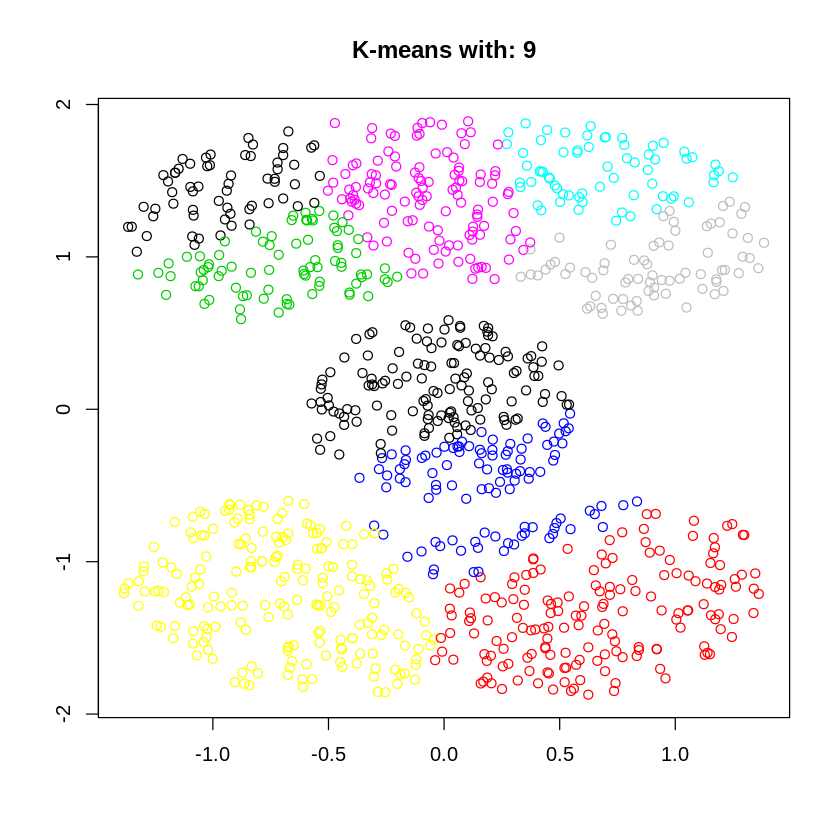

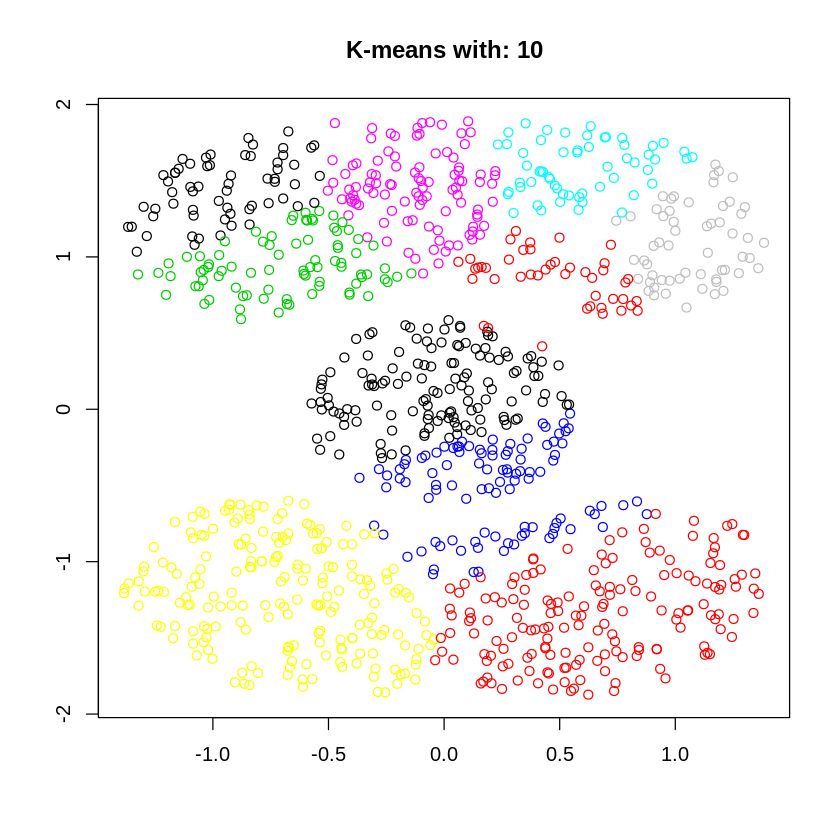

In [22]:
list_i = 1
while( list_i <= length(partition_list) ){
    plot(Cassini$x, col = cl_class_ids(partition_list[[list_i]]), xlab = "", ylab = "", main = paste("K-means with:",(list_i+1)))
    list_i = list_i + 1
}